In [48]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [49]:
b001_alfven_files = '../data/GK_modes/solgk_alf_b001_cb_ext.eig'
b1_alfven_files = '../data/GK_modes/solgk_alf_b1.eig'
b001_slow_files = '../data/GK_modes/solgk_slow_b001.eig'
b1_slow_files = '../data/GK_modes/solgk_slow_b1.eig'

b001_alfven_data = np.loadtxt(b001_alfven_files)
b1_alfven_data = np.loadtxt(b1_alfven_files)
b001_slow_data = np.loadtxt(b001_slow_files)
b1_slow_data = np.loadtxt(b1_slow_files)

In [50]:
data_list = [b001_alfven_data, b001_slow_data, b1_alfven_data, b1_slow_data]
kperp_list, kpar_list, mva_list = [], [], []
w_list, gamma_list = [], []
for data in data_list:
    kperp = data[:, 1]
    Ebperp = np.sum( data[:, 16:20]**2 , axis = 1)
    Ebpar = np.sum( data[:, 20:22]**2 , axis = 1)
    mva = Ebperp/Ebpar
    kperp_list.append(kperp)
    mva_list.append(mva)
    w_list.append(data[:, 7])
    gamma_list.append(data[:, 8])

In [51]:
kperp_bi_1 = [0.2, 1.0, 2.0, 4.0, 8.0]
hot_wr = [1.00508064, 1.13655115, 1.57770556 ,2.8990671, 5.71804829]
hot_wi = [-0.00185854, -0.0327562, -0.06670535, -0.21006724, -0.81787136]
agk_wr_bi_1 = [1.01, 1.142, 1.583, 2.911, 5.72]
agk_wi_bi_1 = [-0.0023, -0.036, -0.075, -0.23, -0.86]

In [52]:
kperp_bi_001 = [.2, .4, 1., 2., 4., 8.]
agk_wr_bi_001 = [1.02, 1.07, 1.35, 2.01, 3.5, 4.7]
agk_wi_bi_001 = [-4e-3, -0.01645, -0.096, -0.41, -0.95, -1.94]

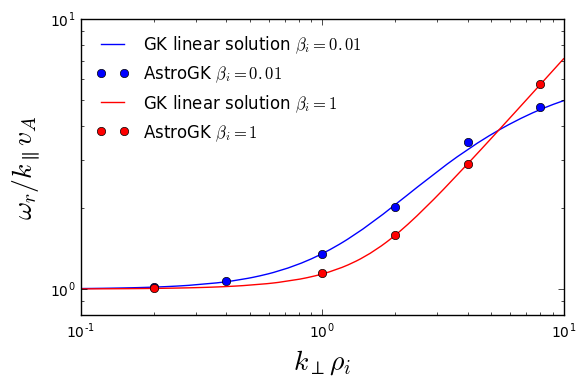

In [54]:
fs = 20
fig, axes = plt.subplots(1, 1, figsize=[6, 4])
axes.plot(kperp_list[0], w_list[0], label = r'GK linear solution $\beta_i = 0.01$')
axes.plot(kperp_bi_001, agk_wr_bi_001, 'ob', label = r'AstroGK $\beta_i = 0.01$')

axes.plot(kperp_list[2], w_list[2], 'r', label = r'GK linear solution $\beta_i = 1$')
axes.plot(kperp_bi_1, agk_wr_bi_1, 'or', label = r'AstroGK $\beta_i = 1$')
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlim(0.1, 10)
axes.set_ylim(0.8, 10)
plt.legend(loc='upper left', frameon=False)
axes.set_xlabel(r'$k_\perp \rho_i$', fontsize = fs)
axes.set_ylabel(r'$\omega_r/k_\parallel v_A$', fontsize = fs)
fig.tight_layout()
# fig.savefig('agk_linear_wr.png', dpi=300)

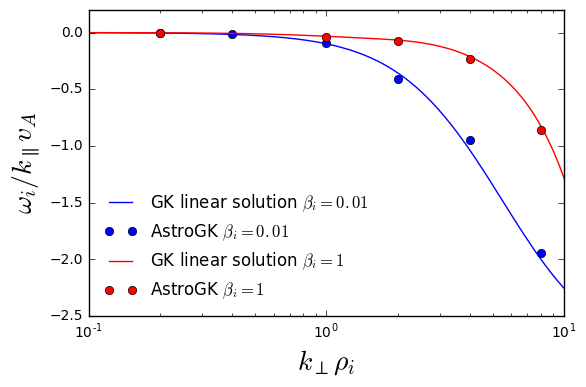

In [59]:
fs = 20
fig, axes = plt.subplots(1, 1, figsize=[6, 4])
axes.plot(kperp_list[0], gamma_list[0], label = r'GK linear solution $\beta_i = 0.01$')
axes.plot(kperp_bi_001, agk_wi_bi_001, 'ob', label = r'AstroGK $\beta_i = 0.01$')

axes.plot(kperp_list[2], gamma_list[2], 'r', label = r'GK linear solution $\beta_i = 1$')
axes.plot(kperp_bi_1, agk_wi_bi_1, 'or', label = r'AstroGK $\beta_i = 1$')
axes.set_xscale('log')
# axes.set_yscale('log')
axes.set_xlim(0.1, 10)
axes.set_ylim(-2.5, 0.2)
plt.legend(loc='lower left', frameon=False)
axes.set_xlabel(r'$k_\perp \rho_i$', fontsize = fs)
axes.set_ylabel(r'$\omega_i/k_\parallel v_A$', fontsize = fs)
fig.tight_layout()
# fig.savefig('agk_linear_wi.png', dpi=300)

In [46]:
ls

Draft_20161004.ipynb                 agk_linear_wr.png
Draft_20161011.ipynb                 crit_bal_disp_rel.png
Draft_20161018.ipynb                 crit_bal_kperp_kpar.png
Draft_20161025.ipynb                 hessi_flare_list.txt
Draft_20161115.ipynb                 nl_bi_001_alfven_qiqe_t_all.png
Draft_20161129.ipynb                 nl_bi_001_mix_decay2_qiqe_t_all.png
Draft_201612013.ipynb                nl_bi_001_mix_qiqe_t_all.png
Draft_20161206.ipynb                 nl_bi_001_qiqe_t_8.png
agk_linear_wi.png


In [57]:
!open agk_linear_wi.png

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# data_dir = '/Volumes/yuguang_sd/proj/new_slow_wave_cascade/stampede/new_low_beta/alfven/'
data_dir = '/Volumes/yuguang_sd/proj/new_slow_wave_cascade/stampede/new_low_beta/'
# data_dir = '/Volumes/yuguang_sd/proj/new_slow_wave_cascade/stampede/new_low_beta/mix_080_decay2/'
# file_names = ['mix_1.heat', 'mix_2.heat', 'mix_3.heat']
# file_names = ['mix_large_4a_next.heat', 'mix_large_4a_6.heat', 'mix_large_7.heat', 'mix_large_8.heat']
file_names = ['alfven/alfven_large_8.heat', 'mix_080/mix_large_8.heat']
# file_names = ['alfven_large_4a_next.heat', 'alfven_large_4a_6.heat', 'alfven_large_7.heat']
# file_names = ['alfven_1.heat', 'alfven_2.heat']
bi = 0.01
per = 2*np.pi*np.sqrt(bi)/1.0

t, hi, he, ci, impci, impce, hci = np.empty(0), np.empty(0), np.empty(0), np.empty(0), np.empty(0), np.empty(0),  np.empty(0)

# ci (column 21), impci (17), and hci (19)

t0 = 0
t, impci, impce = {}, {}, {}
for i, file in enumerate(file_names):
    path = os.path.join(data_dir, file)
    heat = np.loadtxt(path)
    impci[i] = -heat[1:, 16]
    impce[i] = -heat[1:, 17]
    t[i] = heat[1:, 0]/per
    if i == len(file_names)-1:
        t0 = heat[0, 0]/per

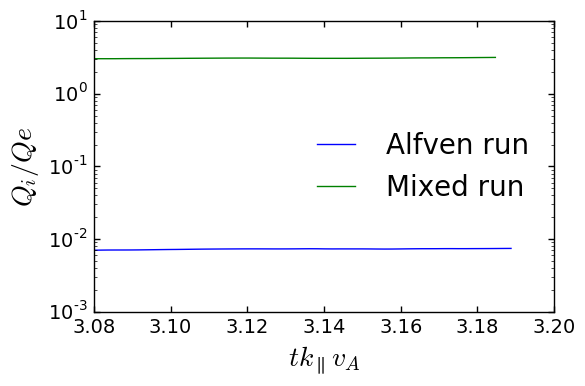

In [9]:
fs = 20
fig, ax = plt.subplots(1, 1)
ax.plot(t[0], impci[0]/impce[0], label = 'Alfven run')
ax.plot(t[1], impci[1]/impce[1], label = 'Mixed run')
ax.set_ylabel('$Q_i/Qe$',  fontsize = fs)

# ax.set_ylim(0, 6)

ax.set_xlim(3.08,  3.2)
ax.set_xlabel('$tk_\parallel v_A$', fontsize = fs)
ax.tick_params(width=1, labelsize=14)
ax.legend(loc='best', frameon=False, fontsize = fs)
ax.set_yscale('log')

#     ax.yaxis.set_tick_params(width=1)

plt.tight_layout()
# fig.savefig('nl_bi_001_qiqe_t_8.png', dpi = 300)

In [10]:
pwd

'/Volumes/yuguang_sd/report/laplace_fourier_analysis/python/Draft'

In [11]:
ls

Draft_20161004.ipynb                 agk_linear_wr.png
Draft_20161011.ipynb                 crit_bal_disp_rel.png
Draft_20161018.ipynb                 crit_bal_kperp_kpar.png
Draft_20161025.ipynb                 hessi_flare_list.txt
Draft_20161115.ipynb                 nl_bi_001_alfven_qiqe_t_all.png
Draft_20161129.ipynb                 nl_bi_001_mix_decay2_qiqe_t_all.png
Draft_201612013.ipynb                nl_bi_001_mix_qiqe_t_all.png
Draft_20161206.ipynb                 nl_bi_001_qiqe_t_8.png
agk_linear_wi.png
